<a href="https://colab.research.google.com/github/deekshanshvardhan/timeseries/blob/main/AR%20Processes/AR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1**
As a warm up and revision to the last week's content, here is the first problem of the week :
Run a linear regression model for the following dataset :
https://www.kaggle.com/datasets/aungpyaeap/fish-market

and predict the weight for the given values of other variables.
Feel free to change the order of code, this notebook is only meant to act as a help if you're not too familiar with Machine Learning in python

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

from statsmodels.formula.api import ols
#import other sklearn libraries for Linear Regression 

In [7]:
from google.colab import files
 
 
uploaded = files.upload()


import io
 
df = pd.read_csv(io.BytesIO(uploaded['Fish.csv']))
print(df)

Saving Fish.csv to Fish (2).csv
    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [12]:
df["Weight"].replace(0, np.nan, inplace=True)
df.isna().sum()

Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [13]:
df.describe(include=["O"])

,Species
count,159
unique,7
top,Perch
freq,56


In [14]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [17]:
sns.set(font_scale= 1.5, rc={"figure.figsize":(10, 6)})
sns.set_style({'axes.facecolor':'white'})

def display_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x, y = p.get_x(), p.get_height()
        ax.annotate(percentage, (x, y), size = 14, weight="bold")


        

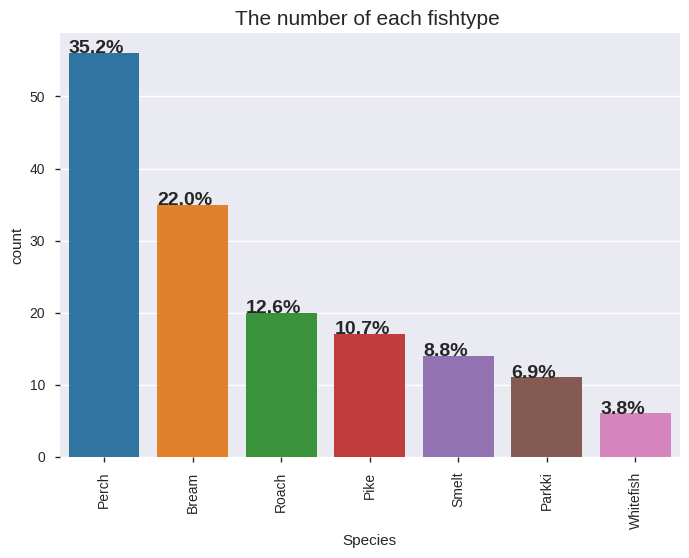

In [37]:
plot= sns.countplot(data=df, x="Species", order=df.Species.value_counts().index)
plt.title("The number of each fishtype ", fontsize=15)
#sns.despine(trim=True, left=True, bottom=True )
display_percentage(plot, df["Species"])
plt.xticks(rotation=90)
plt.show()

In [28]:
df.drop( ["Length2", "Length3"], axis= 1, inplace= True)
#Look at the new form of our dataset.
df.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [33]:
def boxplot(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxenplot(x="Species", y=var, data=df,palette='rainbow')
    plt.xticks(rotation=90)

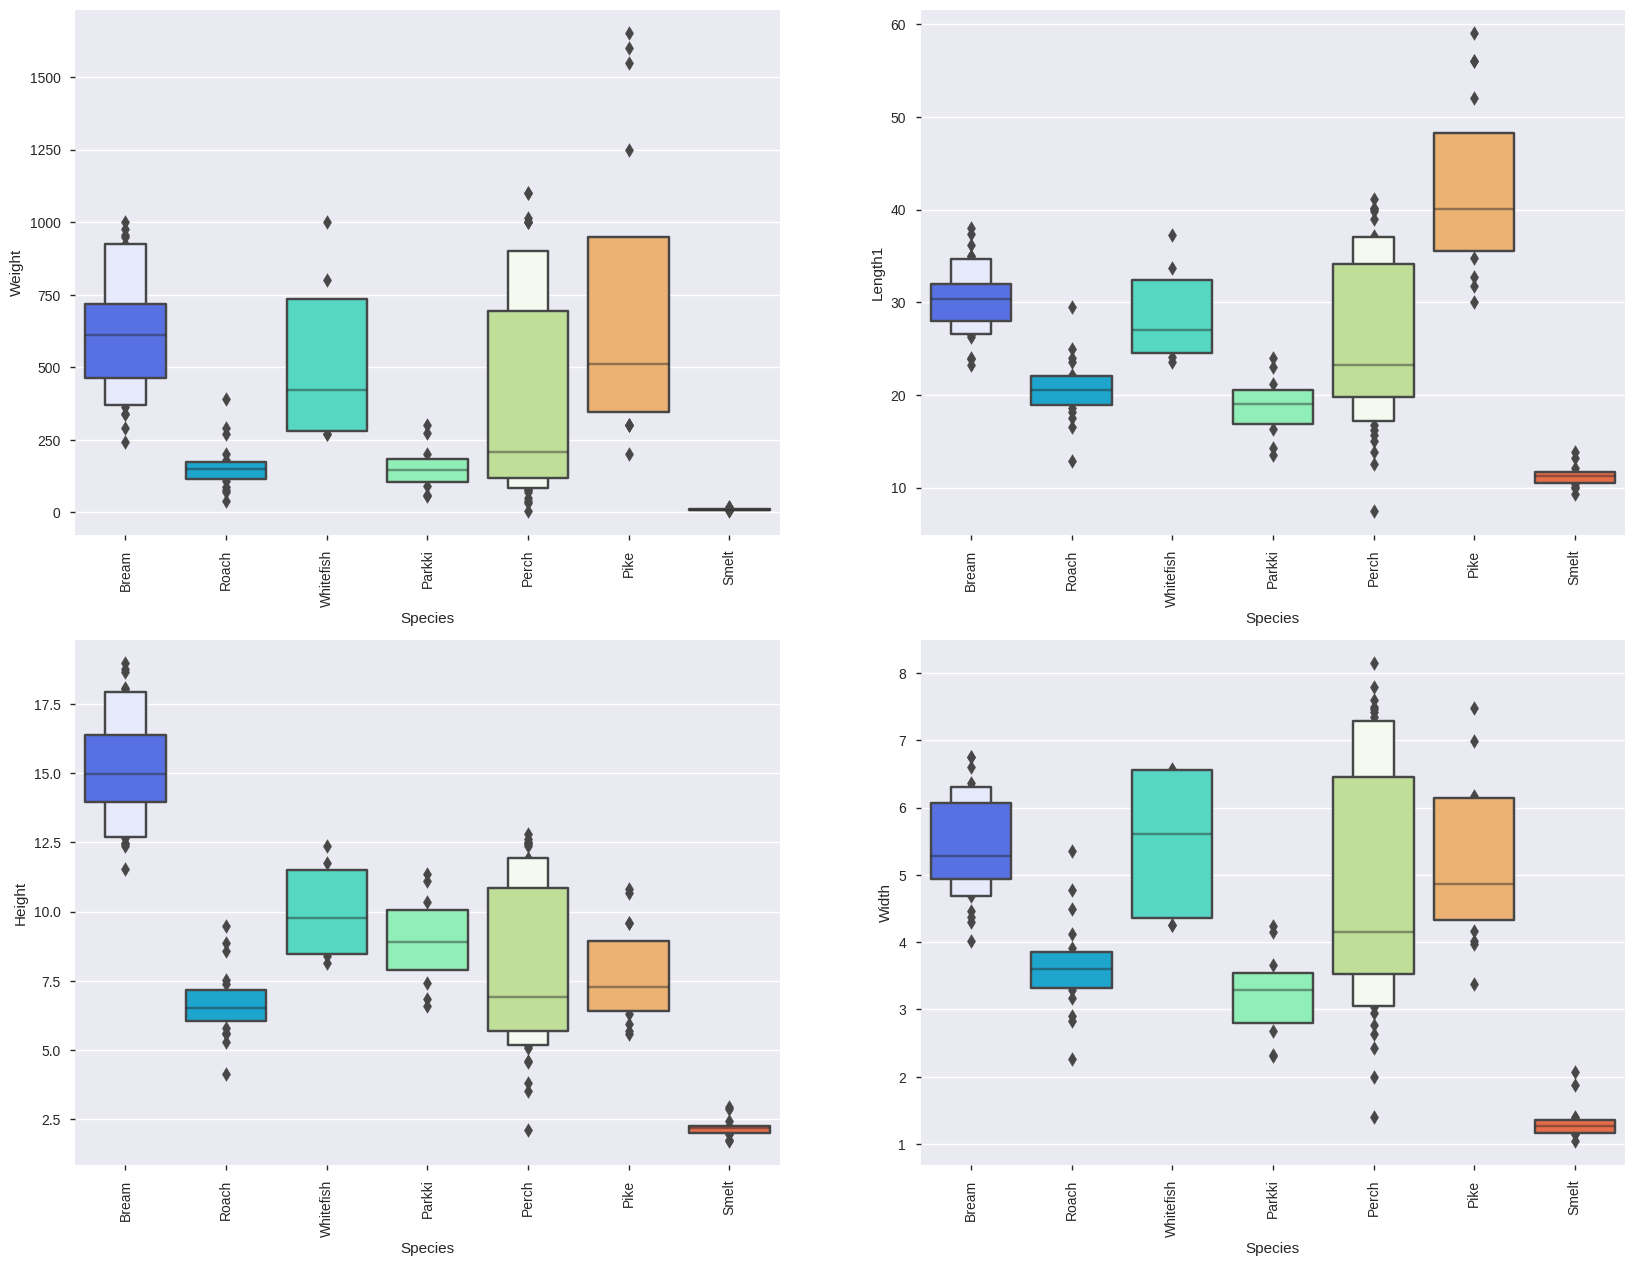

In [34]:
col=["Weight","Length1", "Height","Width"]
fig, ax = plt.subplots(2, 3,figsize=(20,15))
a=1
for i in col:
  plt.subplot(2,2,a)
  boxplot(df[i])
  a +=1

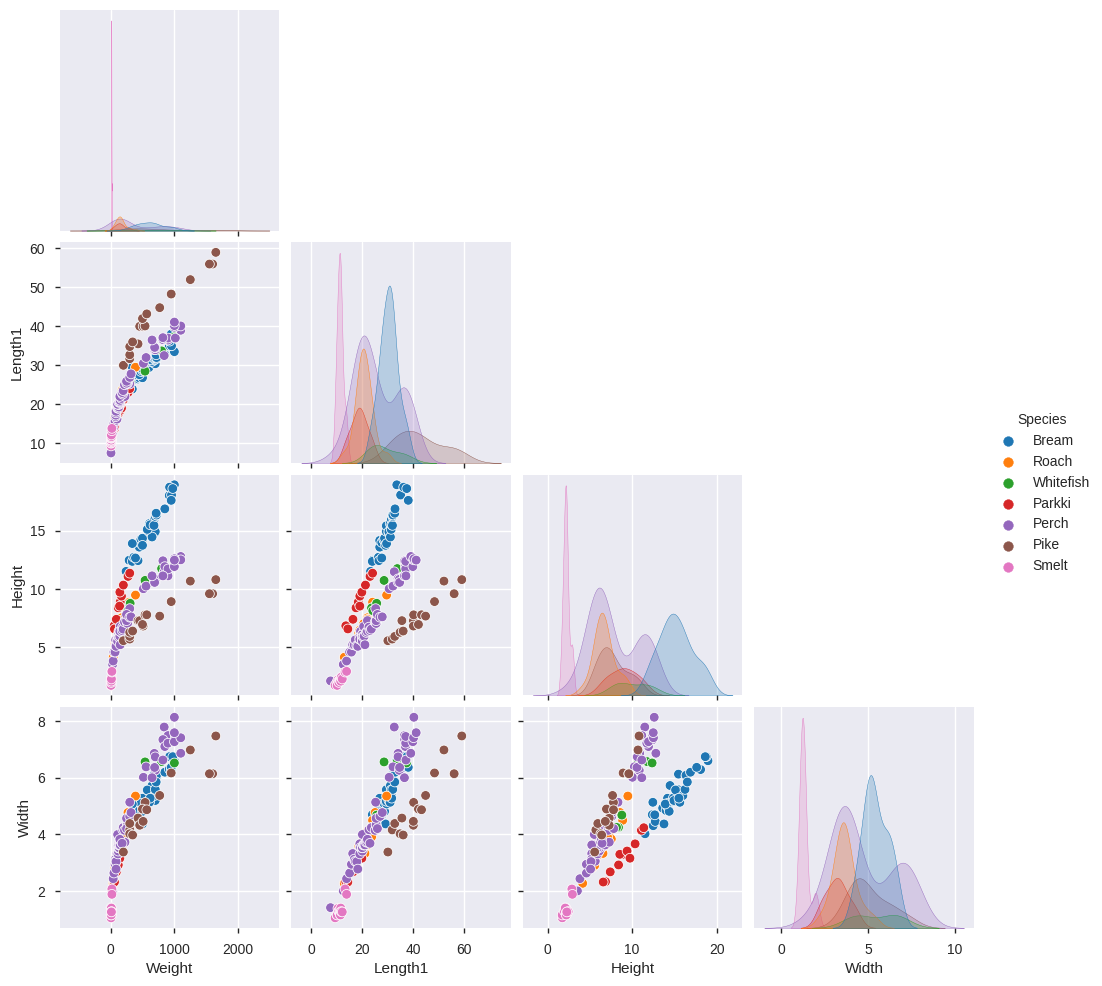

In [39]:
sns.pairplot(data=df,hue='Species', corner=True);

In [40]:
mass_vs_length = ols("Weight ~ Species", data = df).fit()
print(mass_vs_length.params)

Intercept               617.828571
Species[T.Parkki]      -463.010390
Species[T.Perch]       -235.589286
Species[T.Pike]         100.877311
Species[T.Roach]       -457.775940
Species[T.Smelt]       -606.650000
Species[T.Whitefish]    -86.828571
dtype: float64


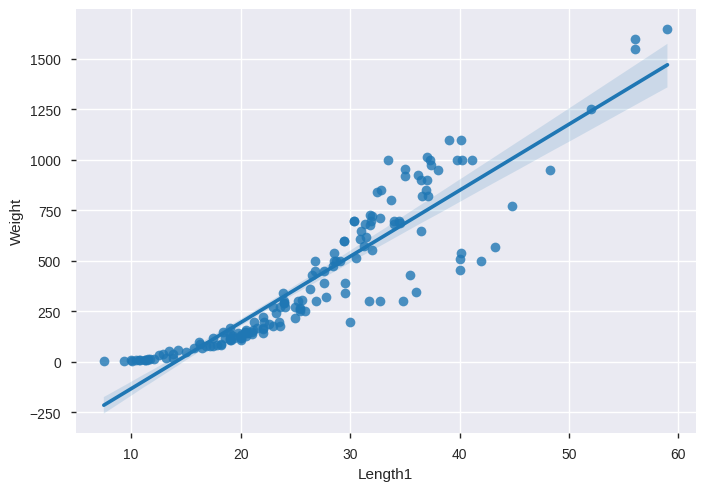

In [41]:
sns.regplot(data= df, x= "Length1", y= "Weight");

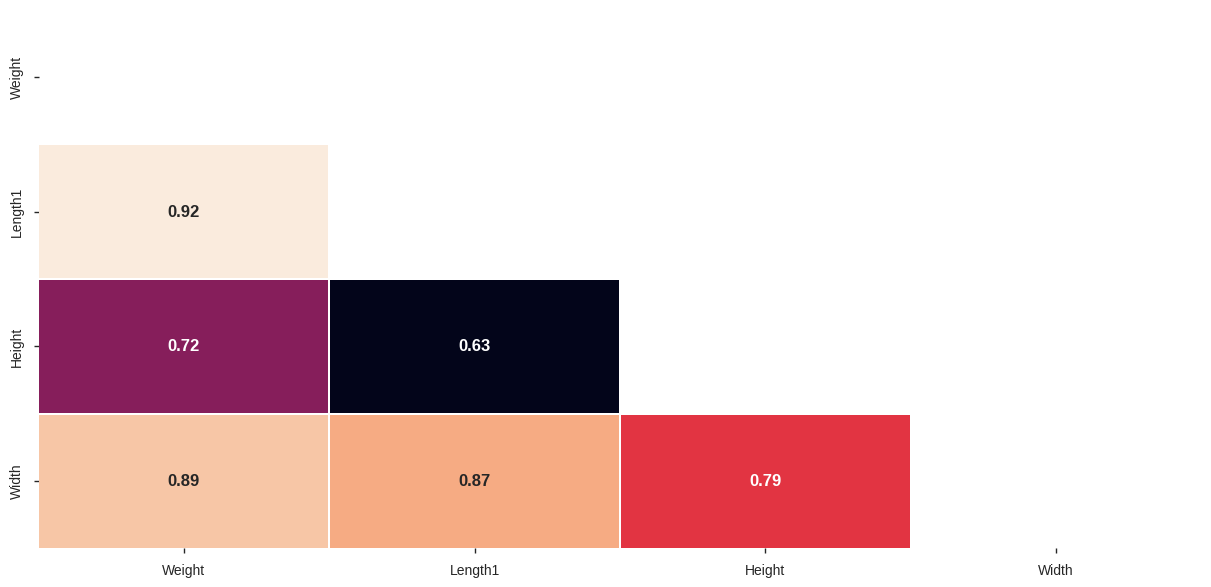

In [42]:
plt.figure(figsize=(15,7))

corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, linewidths=0.5, annot= True, mask= mask, cbar= False,
            fmt=".2f", annot_kws={"fontsize":12, "weight":'bold'}).set_facecolor('white')
plt.show()